In [1]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
  
plt.style.use('seaborn')

%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.express as px

pd.set_option('display.max_columns', None)

import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('Data/df_cleaned.csv')
data.head()

,newlyConst,balcony,totalRent,hasKitchen,cellar,livingSpace,lift,typeOfFlat,geo_plz,noRooms,garden,regio3,date,buildingAge,schufa_yn,PersonalInfo_yn,incomeProof_yn,guarantee_yn,debtFreeProof_yn,ID_yn,utilitiesPrice
0,0,0,955.00,0,0,62.63,0,ground_floor,13086,2.0,0,Weißensee,Oct19,102.0,0,0,0,0,0,0,147.00
1,1,1,1300.00,1,1,46.40,1,apartment,10179,2.0,0,Mitte,Oct19,1.0,0,0,0,0,0,0,150.00
2,0,1,1428.78,1,1,67.00,1,apartment,10963,2.5,0,Kreuzberg,Oct19,3.0,0,0,0,0,0,1,228.78
3,1,1,1559.05,1,1,73.54,1,ground_floor,10557,2.0,0,Tiergarten,Feb20,1.0,0,0,0,0,0,0,221.05
4,0,1,1280.00,1,1,83.14,0,apartment,12527,3.0,0,Köpenick,Oct19,6.0,0,0,0,0,0,0,232.00


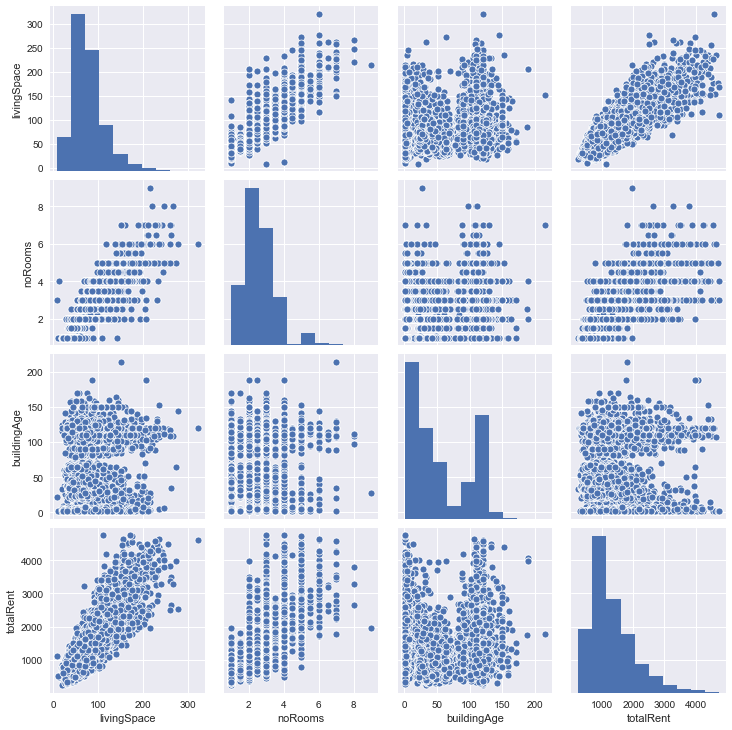

In [3]:
sns.pairplot(data[['livingSpace','noRooms','buildingAge','totalRent']])

## Multicollinearity

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
variables = data[['livingSpace','noRooms','buildingAge','newlyConst']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [6]:
vif

,VIF,features
0,20.466119,livingSpace
1,20.359961,noRooms
2,2.414359,buildingAge
3,1.506105,newlyConst


In [7]:
data.drop('noRooms', axis = 1, inplace = True)

## Create dummy variables

In [8]:
#Including only string columns in a ``DataFrame`` description.
data.describe(include=[np.object])

,typeOfFlat,regio3,date
count,8510,8510,8510
unique,9,24,5
top,apartment,Tiergarten,May19
freq,6095,631,2101


In [9]:
data_dumm = pd.get_dummies(data.drop('date', axis = 1), drop_first = False)

#drop regio3_Mitte from dummies so that it can be the benchmark
data_dumm = data_dumm.drop('regio3_Mitte', axis = 1)

#drop typeOfFlat_apartment from dummies so that it can be the benchmark
data_dumm = data_dumm.drop('typeOfFlat_apartment', axis = 1)


In [10]:
data_dumm.head()

,newlyConst,balcony,totalRent,hasKitchen,cellar,livingSpace,lift,geo_plz,garden,buildingAge,schufa_yn,PersonalInfo_yn,incomeProof_yn,guarantee_yn,debtFreeProof_yn,ID_yn,utilitiesPrice,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat,regio3_Buchholz,regio3_Charlottenburg,regio3_Friedrichshain,regio3_Hellersdorf,regio3_Hohenschönhausen,regio3_Kreuzberg,regio3_Köpenick,regio3_Lichtenberg,regio3_Marzahn,regio3_Neukölln,regio3_Pankow,regio3_Prenzlauer Berg,regio3_Reinickendorf,regio3_Schöneberg,regio3_Spandau,regio3_Steglitz,regio3_Tempelhof,regio3_Tiergarten,regio3_Treptow,regio3_Wedding,regio3_Weißensee,regio3_Wilmersdorf,regio3_Zehlendorf
0,0,0,955.00,0,0,62.63,0,13086,0,102.0,0,0,0,0,0,0,147.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,1,1300.00,1,1,46.40,1,10179,0,1.0,0,0,0,0,0,0,150.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1428.78,1,1,67.00,1,10963,0,3.0,0,0,0,0,0,1,228.78,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1559.05,1,1,73.54,1,10557,0,1.0,0,0,0,0,0,0,221.05,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,1,1280.00,1,1,83.14,0,12527,0,6.0,0,0,0,0,0,0,232.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
variables = data_dumm.drop(['totalRent'], axis = 1)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif[vif['VIF'] > 5]

,VIF,features
4,18.586629,livingSpace
6,42.945613,geo_plz
15,16.504780,utilitiesPrice


In [12]:
#drop geo_plz and utilitiesPrice
data_dumm = data_dumm.drop(['utilitiesPrice', 'geo_plz'], axis = 1)

In [13]:
variables = data_dumm.drop(['totalRent'], axis = 1)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif[vif['VIF'] > 5]

,VIF,features
4,7.008775,livingSpace


## Rearrange columns

data_dumm.columns np.arange

In [14]:
cols = ['totalRent', 'livingSpace', 'newlyConst','buildingAge','balcony','hasKitchen', 'cellar', 'lift',
       'garden', 'schufa_yn', 'PersonalInfo_yn',
       'incomeProof_yn', 'guarantee_yn', 'debtFreeProof_yn', 'ID_yn',
       'typeOfFlat_ground_floor', 'typeOfFlat_half_basement',
       'typeOfFlat_loft', 'typeOfFlat_maisonette', 'typeOfFlat_penthouse',
       'typeOfFlat_raised_ground_floor', 'typeOfFlat_roof_storey',
       'typeOfFlat_terraced_flat', 'regio3_Buchholz', 'regio3_Charlottenburg',
       'regio3_Friedrichshain', 'regio3_Hellersdorf',
       'regio3_Hohenschönhausen', 'regio3_Kreuzberg', 'regio3_Köpenick',
       'regio3_Lichtenberg', 'regio3_Marzahn', 'regio3_Neukölln',
       'regio3_Pankow', 'regio3_Prenzlauer Berg', 'regio3_Reinickendorf',
       'regio3_Schöneberg', 'regio3_Spandau', 'regio3_Steglitz',
       'regio3_Tempelhof', 'regio3_Tiergarten', 'regio3_Treptow',
       'regio3_Wedding', 'regio3_Weißensee', 'regio3_Wilmersdorf',
       'regio3_Zehlendorf']

In [15]:
data_preprocessed = data_dumm[cols]
data_preprocessed.head()

,totalRent,livingSpace,newlyConst,buildingAge,balcony,hasKitchen,cellar,lift,garden,schufa_yn,PersonalInfo_yn,incomeProof_yn,guarantee_yn,debtFreeProof_yn,ID_yn,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat,regio3_Buchholz,regio3_Charlottenburg,regio3_Friedrichshain,regio3_Hellersdorf,regio3_Hohenschönhausen,regio3_Kreuzberg,regio3_Köpenick,regio3_Lichtenberg,regio3_Marzahn,regio3_Neukölln,regio3_Pankow,regio3_Prenzlauer Berg,regio3_Reinickendorf,regio3_Schöneberg,regio3_Spandau,regio3_Steglitz,regio3_Tempelhof,regio3_Tiergarten,regio3_Treptow,regio3_Wedding,regio3_Weißensee,regio3_Wilmersdorf,regio3_Zehlendorf
0,955.00,62.63,0,102.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1300.00,46.40,1,1.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1428.78,67.00,0,3.0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1559.05,73.54,1,1.0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1280.00,83.14,0,6.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Train-Test-Split & feature scaling

In [16]:
data_preprocessed.columns

Index(['totalRent', 'livingSpace', 'newlyConst', 'buildingAge', 'balcony',
       'hasKitchen', 'cellar', 'lift', 'garden', 'schufa_yn',
       'PersonalInfo_yn', 'incomeProof_yn', 'guarantee_yn', 'debtFreeProof_yn',
       'ID_yn', 'typeOfFlat_ground_floor', 'typeOfFlat_half_basement',
       'typeOfFlat_loft', 'typeOfFlat_maisonette', 'typeOfFlat_penthouse',
       'typeOfFlat_raised_ground_floor', 'typeOfFlat_roof_storey',
       'typeOfFlat_terraced_flat', 'regio3_Buchholz', 'regio3_Charlottenburg',
       'regio3_Friedrichshain', 'regio3_Hellersdorf',
       'regio3_Hohenschönhausen', 'regio3_Kreuzberg', 'regio3_Köpenick',
       'regio3_Lichtenberg', 'regio3_Marzahn', 'regio3_Neukölln',
       'regio3_Pankow', 'regio3_Prenzlauer Berg', 'regio3_Reinickendorf',
       'regio3_Schöneberg', 'regio3_Spandau', 'regio3_Steglitz',
       'regio3_Tempelhof', 'regio3_Tiergarten', 'regio3_Treptow',
       'regio3_Wedding', 'regio3_Weißensee', 'regio3_Wilmersdorf',
       'regio3_Zehlendorf'

In [17]:
# select features to use for models
features = ['livingSpace', 'newlyConst', 'buildingAge',
       'balcony', 'hasKitchen', 'cellar', 'lift', 'garden', 'schufa_yn',
       'PersonalInfo_yn', 'incomeProof_yn', 'guarantee_yn', 'debtFreeProof_yn',
       'ID_yn', 'typeOfFlat_ground_floor', 'typeOfFlat_half_basement',
       'typeOfFlat_loft', 'typeOfFlat_maisonette', 'typeOfFlat_penthouse',
       'typeOfFlat_raised_ground_floor', 'typeOfFlat_roof_storey',
       'typeOfFlat_terraced_flat', 'regio3_Buchholz', 'regio3_Charlottenburg',
       'regio3_Friedrichshain', 'regio3_Hellersdorf',
       'regio3_Hohenschönhausen', 'regio3_Kreuzberg', 'regio3_Köpenick',
       'regio3_Lichtenberg', 'regio3_Marzahn', 'regio3_Neukölln',
       'regio3_Pankow', 'regio3_Prenzlauer Berg', 'regio3_Reinickendorf',
       'regio3_Schöneberg', 'regio3_Spandau', 'regio3_Steglitz',
       'regio3_Tempelhof', 'regio3_Tiergarten', 'regio3_Treptow',
       'regio3_Wedding', 'regio3_Weißensee', 'regio3_Wilmersdorf',
       'regio3_Zehlendorf']

In [18]:
target = data_preprocessed['totalRent']
inputs = data_preprocessed[features]

In [63]:
#inputs.to_json('Data/model_inputs.json')

In [19]:
inputs

,livingSpace,newlyConst,buildingAge,balcony,hasKitchen,cellar,lift,garden,schufa_yn,PersonalInfo_yn,incomeProof_yn,guarantee_yn,debtFreeProof_yn,ID_yn,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat,regio3_Buchholz,regio3_Charlottenburg,regio3_Friedrichshain,regio3_Hellersdorf,regio3_Hohenschönhausen,regio3_Kreuzberg,regio3_Köpenick,regio3_Lichtenberg,regio3_Marzahn,regio3_Neukölln,regio3_Pankow,regio3_Prenzlauer Berg,regio3_Reinickendorf,regio3_Schöneberg,regio3_Spandau,regio3_Steglitz,regio3_Tempelhof,regio3_Tiergarten,regio3_Treptow,regio3_Wedding,regio3_Weißensee,regio3_Wilmersdorf,regio3_Zehlendorf
0,62.63,0,102.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,46.40,1,1.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,67.00,0,3.0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,73.54,1,1.0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,83.14,0,6.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8505,99.40,1,1.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8506,70.00,0,7.0,1,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8507,92.89,0,5.0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8508,101.02,0,30.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [20]:
#scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [21]:
inputs_scaled = scaler.transform(inputs)

## Split data

In [22]:
from sklearn.model_selection import train_test_split
X = inputs_scaled
y = target

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 103 )

## Multiple linear regression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [26]:
pred = reg.predict(X_train)

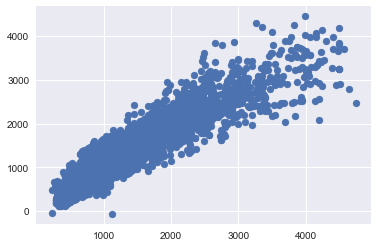

In [27]:
plt.scatter(y_train, pred)
plt.show()

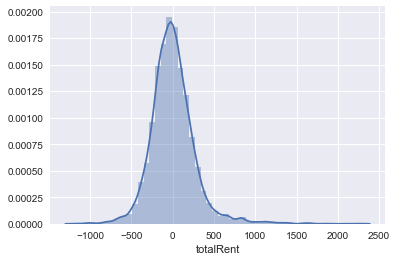

In [28]:
sns.distplot(y_train - pred)

In [29]:
reg.score(X_train, y_train)

0.8577272469589686

In [30]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(reg, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3))

-193.42610412144072

In [31]:
# Summary of feature weight
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,livingSpace,526.668526
1,newlyConst,76.436813
2,buildingAge,0.544066
3,balcony,-5.007866
4,hasKitchen,62.415226
5,cellar,8.056874
6,lift,53.656616
7,garden,18.509210
8,schufa_yn,-10.344565
9,PersonalInfo_yn,-6.366237


Then benchmark variable for regio3 was 'Mitte' while the benchmark variable for apartmentType was 'apartment'

From the weights table above we can see that all arears (regio3) have  negative weights, meaning that rents in all of the areas are lower than in Mitte. 

The feature with the biggest weight appears to be 'livingSpace'.

In [32]:
#using stattsmodels
import statsmodels.api as sm
X_sm = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              totalRent   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1118.
Date:                Wed, 06 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:58:20   Log-Likelihood:                -59759.
No. Observations:                8510   AIC:                         1.196e+05
Df Residuals:                    8464   BIC:                         1.199e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1310.6548      2.949    444.455      0.000    1304.874    1316.435
x1           526.6075      3.386    155.538      0.000     519.971     533.244
x2            77.5237      3.758     20.627      0.000      70.156      84.891
x3            -1.7817      4.237     -0.420      0.674     -10.088       6.524
x4            -4.7445      3.254     -1.458      0.145     -11.124       1.635
x5            63.2380      3.362     18.807      0.000      56.647      69.829
x6             6.9505      3.178      2.187      0.029       0.720      13.181
x7            49.7049      3.734     13.312      0.000      42.386      57.024
x8            17.0690      3.147      5.424      0.000      10.900      23.238
x9            -7.8262      5.681     -1.378      0.168     -18.962       3.310
x10           -7.6968      3.763     -2.045      0.041     -15.073      -0.321
x11           -1.5941      5.886     -0.271      0.787     -13.133       9.945
x12            1.0562      3.050      0.346      0.729      -4.922       7.034
x13            4.7450      3.660      1.296      0.195      -2.430      11.920
x14            6.1317      3.629      1.690      0.091      -0.982      13.246
x15           -3.5376      3.063     -1.155      0.248      -9.542       2.467
x16           -3.1534      2.969     -1.062      0.288      -8.973       2.666
x17            7.5855      2.971      2.553      0.011       1.762      13.409
x18            3.7668      3.104      1.214      0.225      -2.318       9.851
x19           35.9591      3.032     11.859      0.000      30.015      41.903
x20           -1.2849      2.992     -0.430      0.668      -7.149       4.579
x21            7.7969      3.089      2.524      0.012       1.741      13.853
x22            4.4297      3.032      1.461      0.144      -1.514      10.373
x23          -47.5305      3.129    -15.193      0.000     -53.663     -41.398
x24          -49.9092      4.020    -12.417      0.000     -57.789     -42.030
x25          -34.0063      3.761     -9.042      0.000     -41.379     -26.634
x26         -114.6138      3.736    -30.677      0.000    -121.938    -107.290
x27          -94.6530      3.460    -27.355      0.000    -101.436     -87.870
x28          -20.2348      3.506     -5.772      0.000     -27.107     -13.363
x29         -139.4944      4.124    -33.822      0.000    -147.579    -131.410
x30         -102.9065      3.735    -27.550      0.000    -110.229     -95.584
x31         -116.8971      3.583    -32.630      0.000    -123.920    -109.875
x32          -85.2920      3.930    -21.701      0.000     -92.997     -77.588
x33          -81.3355      3.547    -22.929      0.000     -88.289     -74.382
x34          -11.7723      3.712     -3.171      0.002     -19.050      -4.495
x35         -118.4855      3.998    -29.633      0.000    -126.323    -110.648
x3

## Testing regression

In [33]:
y_hat_test = reg.predict(X_test)

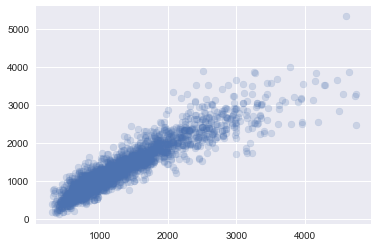

In [34]:
plt.scatter(y_test,y_hat_test, alpha = 0.2)
plt.show()

In [35]:
df_pred = pd.DataFrame(y_hat_test, columns=['Prediction'])

# Undo log transformation to get predctions in €
df_pred = pd.DataFrame((y_hat_test), columns=['Prediction'])

df_pred['Target'] = ((y_test).reset_index(drop = True))
df_pred['Residual'] = df_pred['Target'] - df_pred['Prediction']
df_pred['Diff [%]'] = np.absolute(df_pred['Residual']/df_pred['Target'] * 100)
df_pred.describe()

,Prediction,Target,Residual,Diff [%]
count,2553.000000,2553.000000,2553.000000,2553.000000
mean,1333.633924,1330.389217,-3.244708,16.337813
std,664.230374,720.040977,277.792419,14.954670
min,127.406843,300.000000,-1379.915310,0.013156
25%,850.314118,799.000000,-155.086807,5.986615
50%,1181.701111,1130.000000,-21.182294,12.568360
75%,1704.724008,1690.000000,128.674838,22.164547
max,5334.456377,4747.600000,2268.787948,133.959405


In [36]:
from sklearn.metrics import mean_squared_error
print('RMSE:', np.sqrt(mean_squared_error(df_pred['Target'],df_pred['Prediction'])))

RMSE: 277.75696126067936


In [37]:
y_true = df_pred['Target']
y_pred = df_pred['Prediction']
rmspe = (np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))) * 100
print(f'The root mean squared precent error is: \n{round((rmspe),2)}%')

The root mean squared precent error is: 
22.15%


In [38]:
df_pred.sort_values(by = ['Diff [%]'], ascending=False).head()

,Prediction,Target,Residual,Diff [%]
1999,745.745604,318.75,-426.995604,133.959405
1485,779.814645,341.80,-438.014645,128.149399
675,1107.330269,518.54,-588.790269,113.547705
1618,919.716640,454.02,-465.696640,102.571834
2499,682.263490,337.02,-345.243490,102.440060


## Lasso regression

In [39]:
#lasso regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

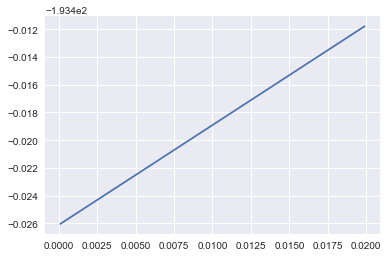

In [40]:
# finding best alpha value
error = []
alpha = []
for i in range(1,200):
    alpha.append(i/10000)
    lml = Lasso(alpha= (i/10000))
    error.append(np.mean(cross_val_score(lml, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3)))
    
plt.plot(alpha, error)

In [41]:
err = tuple(zip(alpha, error))
df_err = pd.DataFrame(err, columns = ['alpha', 'error'])
best_alpha = df_err[df_err['error'] == df_err['error'].max()]['alpha'].values[0]

In [42]:
lm_l = Lasso(alpha = best_alpha)
lm_l.fit(X_train, y_train)
np.mean(cross_val_score(lm_l, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3))

-193.41178554335667

## Random forest

In [43]:
# Random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

In [44]:
# before tuning
np.mean(cross_val_score(rf,X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3))

-181.09168722515247

In [45]:
#tune models with GridsearchCV
from sklearn.model_selection import GridSearchCV

#Number of trees in random forest
n_estimators = range(295,300,5)

#Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

#Max. number of levels in tree
max_depth = [2,5]

#Min. number of samples to split a node
max_sample_split = [2,5]

#Min. number of samples at each leaf node
min_samples_leaf = [1,3]

#Method of selecting samples for training each tree
bootstrap = [True, False]

In [46]:
param_grid = { 
    'n_estimators': n_estimators,
    'max_features': max_features
}

print(param_grid)

{'n_estimators': range(295, 300, 5), 'max_features': ['auto', 'sqrt', 'log2']}


In [47]:
gs = GridSearchCV(rf, param_grid, scoring= 'neg_mean_absolute_error', cv= 3)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(295, 300, 5)},
             scoring='neg_mean_absolute_error')

In [48]:
# after tuning
gs.best_score_

-171.6993693010655

In [49]:
gs.best_estimator_

RandomForestRegressor(max_features='sqrt', n_estimators=295, random_state=42)

## Testing and evaluating all models

In [50]:
#testing all models
pred_reg = reg.predict(X_test)
pred_lml = lm_l.predict(X_test)
pred_rf = gs.best_estimator_.predict(X_test)

In [51]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print('Mean absolute error\n')
print('Multiple linear regression:',round(mean_absolute_error(y_test, pred_reg),2))
print('Lasso regression:          ' ,round(mean_absolute_error(y_test, pred_lml),2))
print('Random forest:             ' ,round(mean_absolute_error(y_test, pred_rf),2))

print('\nRoot mean squared error\n')

print('Multiple linear regression:',round(np.sqrt(mean_squared_error(y_test, pred_reg)),2))
print('Lasso regression:          ' ,round(np.sqrt(mean_squared_error(y_test, pred_lml)),2))
print('Random forest:             ' ,round(np.sqrt(mean_squared_error(y_test, pred_rf)),2))

print('\nR-squared\n')

print('Multiple linear regression:',round(r2_score(y_test, pred_reg),2))
print('Lasso regression:          ' ,round(r2_score(y_test, pred_lml),2))
print('Random forest:             ' ,round(r2_score(y_test, pred_rf),2))

Mean absolute error

Multiple linear regression: 194.92
Lasso regression:           194.92
Random forest:              167.69

Root mean squared error

Multiple linear regression: 277.76
Lasso regression:           277.76
Random forest:              260.41

R-squared

Multiple linear regression: 0.85
Lasso regression:           0.85
Random forest:              0.87


In [58]:
# serielize model using pickle
import pickle
# save the model to disk
model = gs.best_estimator_
path = 'Model/finalized_RFmodel.sav'
pickle.dump(model, open(path, 'wb'))

In [59]:
# testing with custom inputs
# load the model from disk
path =r'Model\finalized_RFmodel.sav'
loaded_model = pickle.load(open(path, 'rb'))
result = loaded_model.predict(X_test)
print(result)

[ 915.47222155 1291.42430508 1283.79889777 ... 1393.78448305 3254.85109605
 1301.74352542]


In [ ]:
# create a dictionary with feature names as keys
#a = inputs.columns
#d = {el:0 for el in a}

In [60]:
# input desired features
d = {'livingSpace': 52,
 'newlyConst': 0,
 'buildingAge': 50,
 'balcony': 0,
 'hasKitchen': 1,
 'cellar': 1,
 'lift': 0,
 'garden': 0,
 'schufa_yn': 1,
 'PersonalInfo_yn': 1,
 'incomeProof_yn': 1,
 'guarantee_yn': 1,
 'debtFreeProof_yn': 1,
 'ID_yn': 1,
 'typeOfFlat_ground_floor': 0,
 'typeOfFlat_half_basement': 0,
 'typeOfFlat_loft': 0,
 'typeOfFlat_maisonette': 0,
 'typeOfFlat_penthouse': 0,
 'typeOfFlat_raised_ground_floor': 0,
 'typeOfFlat_roof_storey': 0,
 'typeOfFlat_terraced_flat': 0,
 'regio3_Buchholz': 0,
 'regio3_Charlottenburg': 0,
 'regio3_Friedrichshain': 0,
 'regio3_Hellersdorf': 0,
 'regio3_Hohenschönhausen': 0,
 'regio3_Kreuzberg': 0,
 'regio3_Köpenick': 0,
 'regio3_Lichtenberg': 0,
 'regio3_Marzahn': 0,
 'regio3_Neukölln': 0,
 'regio3_Pankow': 0,
 'regio3_Prenzlauer Berg': 1,
 'regio3_Reinickendorf': 0,
 'regio3_Schöneberg': 0,
 'regio3_Spandau': 0,
 'regio3_Steglitz': 0,
 'regio3_Tempelhof': 0,
 'regio3_Tiergarten': 0,
 'regio3_Treptow': 0,
 'regio3_Wedding': 0,
 'regio3_Weißensee': 0,
 'regio3_Wilmersdorf': 0,
 'regio3_Zehlendorf': 0}

In [61]:
new_inputs = pd.DataFrame(data = d , index = [0])
new_inputs = new_inputs.append(inputs, ignore_index=True)

#scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(new_inputs)
new_inputs_scaled = scaler.transform(new_inputs)
X_input = new_inputs_scaled

In [62]:
pred_rf = gs.best_estimator_.predict(X_input)
print('Approx. total rent:', round(pred_rf[0],2))

Approx. total rent: 960.0
